In [ ]:
import os
import pandas as pd
from PIL import Image
import numpy as np

/Users/krishhashia/Expressionist


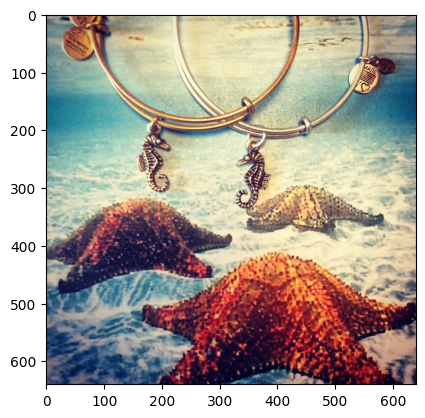

In [5]:
!pwd

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
image = mpimg.imread('style_images/images/0.jpg')
plt.imshow(image)
plt.show()

In [42]:
import tensorflow as tf
print(tf.config.list_physical_devices('GPU'))

[]


In [41]:
from PIL import Image
import numpy as np

# Load image and convert to numpy array
image_path = '/Users/krishhashia/Expressionist/style_images/images/0.jpg'
img = Image.open(image_path)
img_array = np.array(img)  # Convert image to numpy array
print("Original image shape:", img_array.shape)

# Define preprocessing functions
def resize_image(image, target_size=(224, 224)):
    return np.array(Image.fromarray(image).resize(target_size))

def normalize_image(image):
    return image / 255.0

def conv_float32(image):
    return image.astype('float32')

def preprocess_image(image, target_size=(64, 64)):
    # Resize to target size for model input
    image = Image.fromarray(image).resize(target_size)
    image = np.array(image)
    # Normalize
    image = normalize_image(image)
    # Convert to float32 type
    image = conv_float32(image)
    return image

# Preprocess the image for ML tasks (use smaller size, normalize)
img_preprocessed = preprocess_image(img_array)

# Convert preprocessed image back to 0-255 range and resize only for viewing
random_array = (img_preprocessed * 255).astype(np.uint8)
random_image = Image.fromarray(random_array).resize((640, 640), Image.NEAREST)  # Resize for display

# Show the higher-resolution output without quality loss
random_image.show()

Original image shape: (640, 640, 3)


In [80]:
# test_file_path = 'style_images/emotion_index_mapped_files/test_emo_list.txt'
from collections import defaultdict
from pathlib import Path
import pandas as pd

my_dir_path = "style_images/emotion_index_mapped_files"
emotion_mapping = {0:'amusement', 1:'excitement', 2:'awe', 3:'contentment', 4:'disgust', 5:'anger', 6:'fear', 7:'sadness'}
total_length = 0
results = {}
for current_file_path in Path(my_dir_path).iterdir():
    with open(current_file_path, 'r') as file_open:
        result = file_open.readlines()
        results[current_file_path] = {}
        total_length += len(result)
        for index_emotion_str in result:
            index_emotion_split = index_emotion_str.split()
            i = index_emotion_split[0]
            results[current_file_path][i] = {}
            # results[i]['index'] = index_emotion_split[0]
            results[current_file_path][i]['emotion_numeric'] = int(index_emotion_split[1])
            results[current_file_path][i]['emotion_str'] = emotion_mapping[int(index_emotion_split[-1])]
            results[current_file_path][i]['image_path'] = str(current_file_path)+f'/{index_emotion_split[0]}.jpg'

# pre processing to be carried out on image before inserting as numpy array - to experiment how resizing and resampling is going to affect
# image readability when converted back into normal image for representation purposes.

# Possible TODO: keep image preprocessing as part of dataframe insertion instead of inserting complete paths to images in dataframe

# Define the target columns
data_records = []

# Iterate through the results dictionary and extract relevant information
for folder, images_dict in results.items():
    for index, image_data in images_dict.items():
        # Append each record as a dictionary to the list
        data_records.append({
            'index': index,
            'emotion_numeric': image_data['emotion_numeric'],
            'emotion_str': image_data['emotion_str'],
            'image_path': image_data['image_path']
        })

# Create DataFrame from the list of dictionaries
df = pd.DataFrame(data_records)


In [55]:
for current_file_path in Path(my_dir_path).iterdir():
    with open(current_file_path, 'r') as file_open:
        result = file_open.readlines()
        print(len(result))

2208
15460
4418


In [82]:
type(df['emotion_numeric'][0])

numpy.int64

In [83]:
# Display all columns without truncation
pd.set_option('display.max_columns', None)     # Show all columns
pd.set_option('display.max_colwidth', None)    # Show full width for each column
pd.set_option('display.width', 1000)           # Set width to avoid line breaks
pd.set_option('display.max_rows', 10)          # Limit rows to avoid excessive output, adjust as needed

sample_df = df[df['emotion_str'] == 'amusement'].sample(5)
print(sample_df)

# Optional: Save to a CSV file if needed
df.to_csv('image_emotions_dataset.csv', index=False)


       index  emotion_numeric emotion_str                                                            image_path
16068  13860                0   amusement  style_images/emotion_index_mapped_files/train_emo_list.txt/13860.jpg
10574   8366                0   amusement   style_images/emotion_index_mapped_files/train_emo_list.txt/8366.jpg
11508   9300                0   amusement   style_images/emotion_index_mapped_files/train_emo_list.txt/9300.jpg
19598  19598                0   amusement   style_images/emotion_index_mapped_files/test_emo_list.txt/19598.jpg
4945    2737                0   amusement   style_images/emotion_index_mapped_files/train_emo_list.txt/2737.jpg


<Axes: xlabel='emotion_str'>

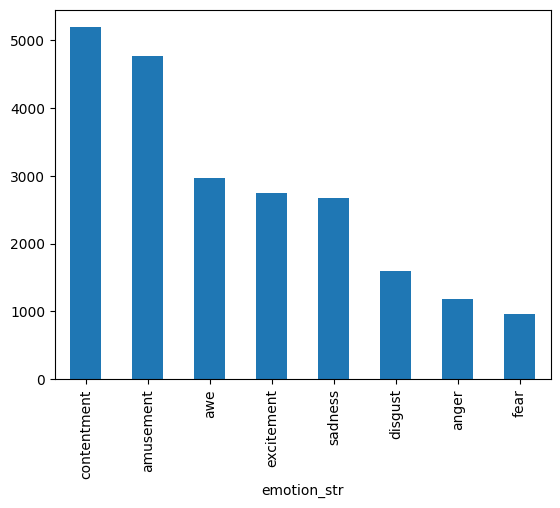

In [86]:
df["emotion_numeric"]=df["emotion_numeric"].astype(float)
# df.plot.hist(column='emotion_numeric')
# Plot a bar chart of emotion counts based on 'emotion_str'
df['emotion_str'].value_counts().plot(kind='bar')

In [ ]:
# 'emotion' (dict): Confidence scores for each emotion category.
# - 'sad': Confidence score for sadness.
# - 'angry': Confidence score for anger.
# - 'surprise': Confidence score for surprise.
# - 'fear': Confidence score for fear.
# - 'happy': Confidence score for happiness.
# - 'disgust': Confidence score for disgust.
# - 'neutral': Confidence score for neutrality.